# Getting Started With ANN

## Loading Data and Preprocessing

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [54]:
data = pd.read_csv('Churn_Modelling.csv') #using the churn dataset to predict wether a customer exits or stays
X = data.iloc[:, 3:13].values
Y = data.iloc[:,13].values

In [55]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder #Encoding
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])


In [56]:
onehotencoder = OneHotEncoder(categorical_features = [1]) #Telling the model not to rank the data
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/home/aayushi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/aayushi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Setting Up The Neural Network!

In [59]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [123]:
classifier = Sequential() 
classifier.add(Dense(units = 6,kernel_initializer = 'glorot_uniform', activation = 'relu',input_dim=11)) #Latest version of keras has 'units' instead of 'output_dim'
classifier.add(Dense(units = 6, kernel_initializer = 'glorot_uniform',activation = 'relu',input_dim=11))
classifier.add(Dense(units = 6, kernel_initializer = 'glorot_uniform',activation = 'relu',input_dim=11))
classifier.add(Dense(units = 1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))

In [124]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [125]:
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

W1108 01:58:41.075646 140068142126912 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
8000/8000 [==============================] - 3s 404us/sample - loss: 0.5272 - acc: 0.7722
Epoch 2/100
8000/8000 [==============================] - 3s 388us/sample - loss: 0.4366 - acc: 0.8062
Epoch 3/100
8000/8000 [==============================] - 3s 378us/sample - loss: 0.4260 - acc: 0.8138
Epoch 4/100
8000/8000 [==============================] - 3s 412us/sample - loss: 0.4195 - acc: 0.8171
Epoch 5/100
8000/8000 [==============================] - 3s 386us/sample - loss: 0.4150 - acc: 0.8226
Epoch 6/100
8000/8000 [==============================] - 3s 363us/sample - loss: 0.4102 - acc: 0.8271
Epoch 7/100
8000/8000 [==============================] - 3s 396us/sample - loss: 0.4043 - acc: 0.8291
Epoch 8/100
8000/8000 [==============================] - 4s 446us/sample - loss: 0.3964 - acc: 0.8344
Epoch 9/100
8000/8000 [==============================] - ETA: 0s - loss: 0.3841 - acc: 0.840 - 4s 444us/sample - loss: 0.3851 - acc: 0.8397
Epoch 10/100
8000/8000 [====================

8000/8000 [==============================] - 4s 464us/sample - loss: 0.3299 - acc: 0.8639
Epoch 81/100
8000/8000 [==============================] - 4s 439us/sample - loss: 0.3302 - acc: 0.8659
Epoch 82/100
8000/8000 [==============================] - 4s 472us/sample - loss: 0.3306 - acc: 0.8637
Epoch 83/100
8000/8000 [==============================] - 4s 459us/sample - loss: 0.3302 - acc: 0.8656
Epoch 84/100
8000/8000 [==============================] - 4s 445us/sample - loss: 0.3299 - acc: 0.8658
Epoch 85/100
8000/8000 [==============================] - 4s 487us/sample - loss: 0.3303 - acc: 0.8631
Epoch 86/100
8000/8000 [==============================] - 4s 532us/sample - loss: 0.3296 - acc: 0.8656
Epoch 87/100
8000/8000 [==============================] - 4s 444us/sample - loss: 0.3300 - acc: 0.8654
Epoch 88/100
8000/8000 [==============================] - 4s 445us/sample - loss: 0.3299 - acc: 0.8654
Epoch 89/100
8000/8000 [==============================] - 4s 480us/sample - loss: 0.33

In [126]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[1512,   83],
       [ 199,  206]])

### Plotting Accuracy and Loss for the Test Set

Text(0, 0.5, 'Value')

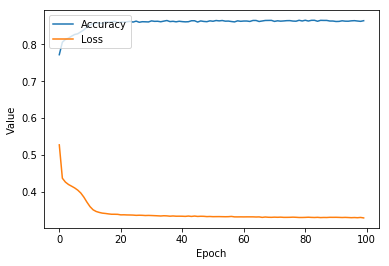

In [128]:
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['loss'])
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Value')


Next Steps : Tune the hyper-parameters to get the highest possible accuracy.